In [1]:
!pip install pymc arviz

Output()

Output()

         mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
mu     57.981  0.770    56.487     59.581      0.016    0.012    2307.0   
sigma   2.351  0.688     1.279      3.613      0.015    0.011    2277.0   

       ess_tail  r_hat  
mu       1785.0    1.0  
sigma    2099.0    1.0  


array([<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'sigma'}>],
      dtype=object)

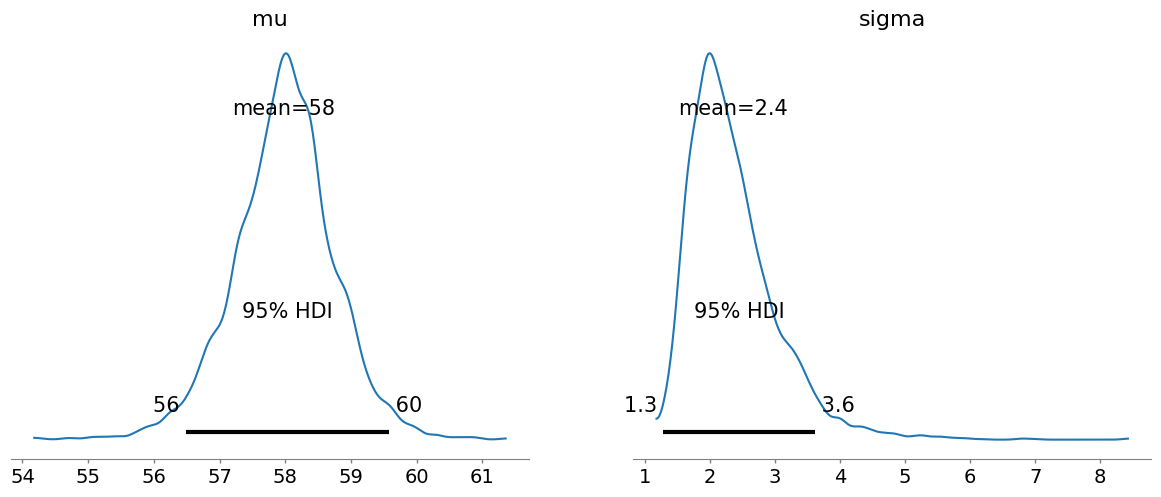

In [3]:
import pymc as pm
import numpy as np
import arviz as az

obs = np.array([56, 60, 58, 55, 57, 59, 61, 56, 58, 60])

x = np.mean(obs)

with pm.Model() as model:

    mu = pm.Normal("mu", mu=x, sigma=10)

    sigma = pm.HalfNormal("sigma", sigma=10)

    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=obs)

    trace = pm.sample(2000, tune=1000, return_inferencedata=True)

print(az.summary(trace, hdi_prob=0.95))

az.plot_posterior(trace, hdi_prob=0.95)